In [4]:
os.getcwd()

'c:\\Users\\daniel paulí\\Desktop\\psiv\\psiv2_matricules'

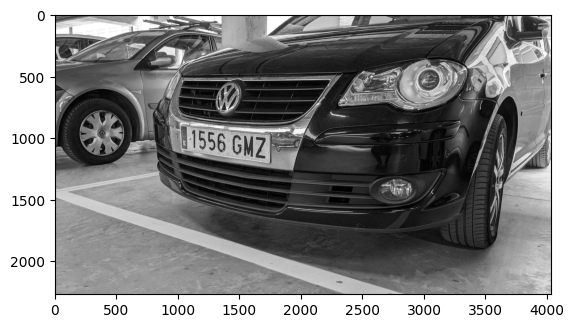

In [51]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from skimage.segmentation import clear_border
import os

path = os.getcwd()+"\\Imatges"

nom_imagenes = os.listdir(path)
imagenes = []
imagenes_b = []
ll_img = []

for titulo in nom_imagenes:
    
    if titulo.endswith('.jpg') or titulo.endswith('.jpeg'):
        img =  cv.imread('Imatges/' + titulo)
        ll_img.append(img)
        img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        b,g,r = cv.split(img)
        imagenes_b.append(b*0.6>img_gris)
        imagenes.append( img_gris)
       

#img = cv.imread('Imatges/matricula_28.jpeg')
#img_gris = cv.cvtColor(imagenes[0], cv.COLOR_BGR2GRAY)
plt.imshow(imagenes[0], cmap="gray")

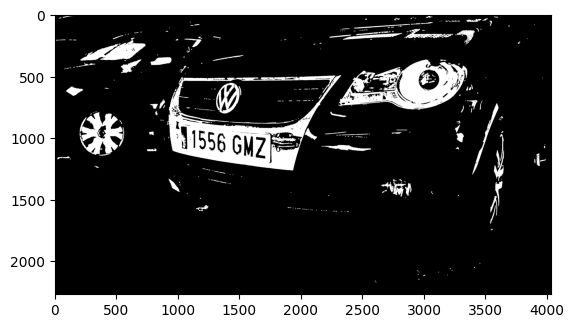

In [52]:

imagenes_edge_removed = []

for imagen in  imagenes:
    
    median = cv.medianBlur(imagen, 3)
    ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    kernel = np.ones((5,5), np.uint8)
    opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
    edge_touching_removed = clear_border(opening)
    contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    imagenes_edge_removed.append(edge_touching_removed)

#median = cv.medianBlur(img_gris, 3)
#ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#kernel = np.ones((5,5), np.uint8)
#opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
#edge_touching_removed = clear_border(opening)
#contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(imagenes_edge_removed[0], cmap="gray")

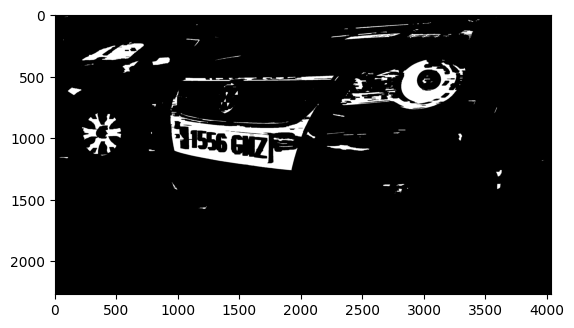

In [53]:
#quitar linias finas elemento que cauan problemas
imagen_opening = []

for imagen in  imagenes_edge_removed:

    median = cv.medianBlur(imagen, 3)
    ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    img_erosion = cv.erode(th, kernel, iterations=4)
    opening = cv.morphologyEx(th, cv.MORPH_ERODE,  np.ones((1,30), np.uint8))
    imagen_opening.append(opening)


plt.imshow(imagen_opening[0], cmap="gray")
#median = cv.medianBlur(imagen, 3)
#ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#kernel = np.ones((3,3), np.uint8)0
#img_erosion = cv.erode(th, kernel, iterations=4)
#opening = cv.morphologyEx(th, cv.MORPH_ERODE,  np.ones((1,30), np.uint8))
#imagen_opening.append(opening)

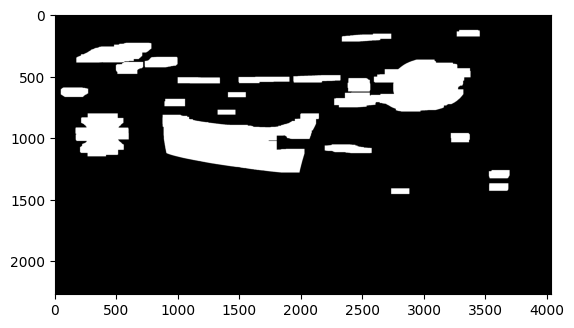

In [54]:

imagenes_cnt = []

for imagen in imagen_opening:
    
    img_erosion = cv.erode(imagen, kernel, iterations=7)
    img_dilation = cv.dilate(img_erosion, kernel, iterations=7)
    img_dilation = cv.dilate(img_dilation, np.ones((2,9), np.uint8), iterations=15)
    img_dilation = cv.dilate(img_dilation, kernel, iterations=5)



    contour,hier = cv.findContours(img_dilation,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)

    for cnt in contour:
        cv.drawContours(img_dilation,[cnt],0,255,-1)

    gray = cv.bitwise_not(img_dilation)



    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    res = cv.morphologyEx(gray,cv.MORPH_OPEN,kernel)
    res = cv.bitwise_not(res)
    
    imagenes_cnt.append(res)

plt.imshow(imagenes_cnt[0], cmap="gray")


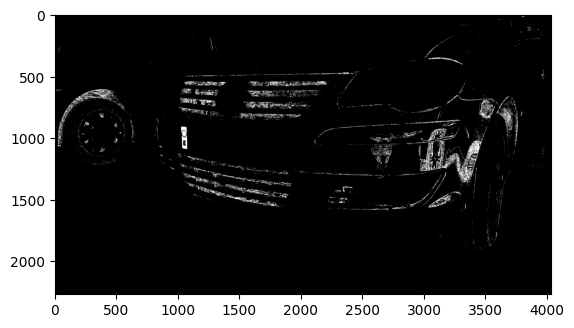

In [55]:
#aqui canvia el codi:

plt.imshow(imagenes_b[0], cmap="gray")

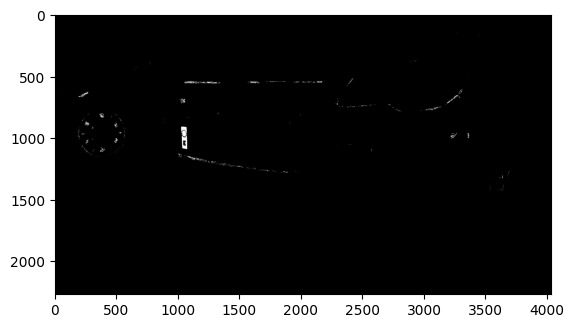

In [56]:
plt.imshow(imagenes_b[0]*imagenes_cnt[0], cmap="gray")

In [67]:
imgagenes_combinadas=[]
for image_c,image_b in zip(imagenes_cnt,imagenes_b):
    comb=image_c*image_b
    comb = cv.erode(comb, kernel, iterations=5)
    comb = cv.dilate(comb, kernel, iterations=5)
    #comb = cv.dilate(comb, np.ones((2,9), np.uint8), iterations=15)
    #comb = cv.dilate(comb, kernel, iterations=5)
    imgagenes_combinadas.append(comb)
    

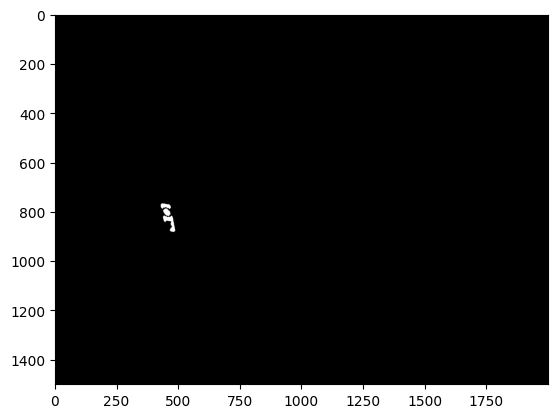

In [108]:
plt.imshow(imgagenes_combinadas[39], cmap="gray")

In [ ]:
def simplify_contour(contour, n_corners=4):
    '''
    Binary searches best `epsilon` value to force contour 
        approximation contain exactly `n_corners` points.

    :param contour: OpenCV2 contour.
    :param n_corners: Number of corners (points) the contour must contain.

    :returns: Simplified contour in successful case. Otherwise returns initial contour.
    '''
    n_iter, max_iter = 0, 100
    lb, ub = 0., 1.

    while True:
        n_iter += 1
        if n_iter > max_iter:
            return contour

        k = (lb + ub)/2.
        eps = k*cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, eps, True)

        if len(approx) > n_corners:
            lb = (lb + ub)/2.
        elif len(approx) < n_corners:
            ub = (lb + ub)/2.
        else:
            return approx